In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/vm1998/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\vm1998\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\vm1998\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\vm1998\AppData\Local\Temp\RtmpqGWH3z\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.2"
Installing package into 'C:/Users/vm1998/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vm1998\AppData\Local\Temp\RtmpqGWH3z\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 3.6.2"
Installing package into 'C:/Users/vm1998/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vm1998\AppData\Local\Temp\RtmpqGWH3z\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Warning message:
"package 'tibble' was built under R version 3.6.2"
Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'readr' was built under R version 3.6.2"
Warning message:
"package 'purrr' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"
Warning message:
"package 'stringr' was built under R version 3.6.2"
Warning message:
"package 'forcats' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x

package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\vm1998\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\vm1998\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\vm1998\AppData\Local\Temp\RtmpqGWH3z\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [37]:
ionomics <- read.csv('New_ionStats_Ratio.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,"NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [41]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [42]:
# Fit the model
model <- lda(Spec_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$Spec_int)
model

[1] 0.9634146

Call:
lda(Spec_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.04878049 0.01219512 0.10975610 0.07317073 0.01219512 0.13414634 0.06097561 
         8          9 
0.01219512 0.53658537 

Group means:
     B11.P31    Na23.P31   Mg26.P31     Al27.P31     S34.P31     K39.P31
1  1.3115058  0.96944122 -0.8421972 -0.246823038  0.62271291 -0.16516025
2  0.5354909  0.02097961 -0.9562407 -0.238733250  0.34049436 -0.12423932
3  0.1743346  1.50706589 -1.0034750  0.066135499 -0.38895137 -0.20964314
4  0.3258179  0.33244891 -0.5970364 -0.179092545 -0.19978646  0.24124381
5 -0.6238442  0.38962793 -1.2344819 -0.064795606 -1.24713240 -1.31521990
6  1.3241850  0.51855429 -0.9267569 -0.215994932  0.67005846  0.08849992
7  0.5915438 -0.13261698 -0.7523263 -0.342609768 -0.14605353 -0.62784060
8 -0.3255940 -0.01940948 -1.2020301 -0.431930750 -0.65004050 -1.82037900
9 -0.6203103 -0.55900218  0.8946141  0.001630492  0.

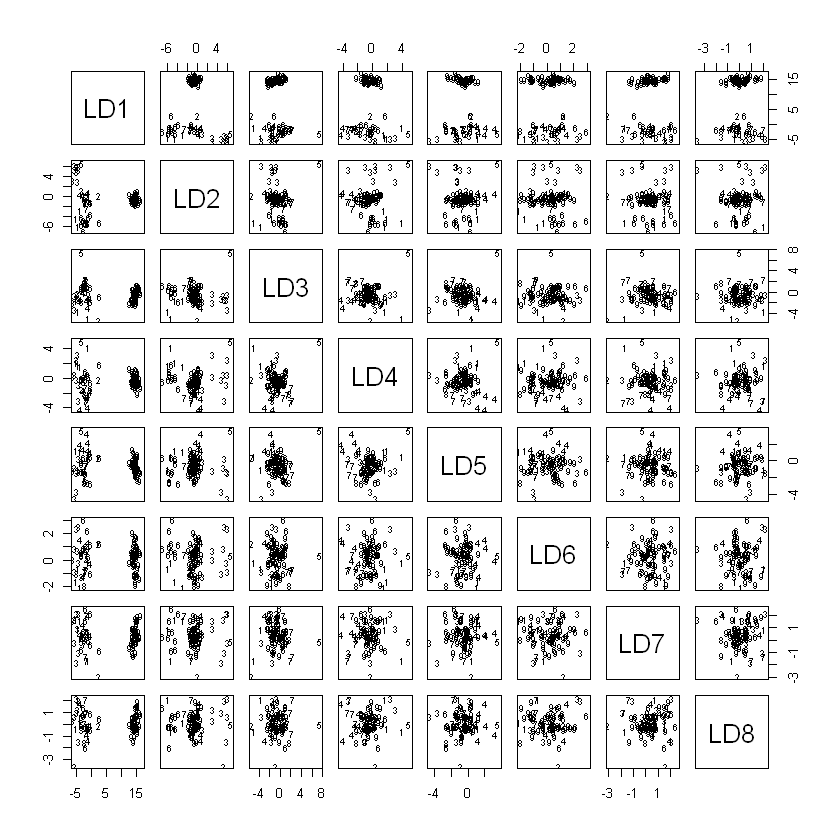

In [35]:
plot(model)

In [36]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 1 2 4
Levels: 1 2 3 4 5 6 7 8 9

,1,2,3,4,5,6,7,8,9
1,9.999999e-01,3.381173e-11,3.678041e-28,2.195842e-17,1.601060e-65,1.499515e-07,3.471928e-20,9.901962e-24,1.999481e-65
2,9.999965e-01,2.928734e-25,1.506281e-25,1.488553e-16,9.158050e-71,3.482455e-06,1.366801e-15,2.203494e-20,5.601474e-89
3,9.999423e-01,8.432712e-21,2.168605e-14,4.005181e-07,1.995000e-43,5.725515e-05,2.507136e-08,1.188813e-10,1.472523e-75
4,9.999967e-01,6.582141e-28,1.843237e-20,3.855329e-12,1.651190e-50,3.272577e-06,1.359103e-12,4.664571e-15,1.633848e-89
5,4.356598e-20,1.000000e+00,3.111192e-23,6.409877e-13,3.610008e-63,1.831875e-18,3.741569e-20,1.813410e-24,4.052670e-39
6,1.378612e-09,5.320884e-14,4.093125e-03,9.949289e-01,2.259007e-37,4.380677e-09,8.255612e-04,1.524258e-04,7.114863e-69


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8
1,-7.960656,-4.649487,-4.501052,4.447313,0.9458941,-0.3835889,-2.0889879,-0.80691613
2,-11.272755,-5.445794,-3.210159,2.011788,-0.6535317,-0.8423492,0.3694238,1.93756466
3,-10.415681,-2.256505,-1.139273,1.923521,1.5436573,-2.2657729,1.1103498,-0.03769182
